In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving train_nlp.csv to train_nlp.csv


In [ ]:
train=pd.read_csv('train_nlp.csv')

In [ ]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
train['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7608    Two giant cranes holding a bridge collapse int...
7609    @aria_ahrary @TheTawniest The out of control w...
7610    M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...
7611    Police investigating after an e-bike collided ...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7613, dtype: object

In [ ]:
len(train)

7613

In [ ]:
train.shape

(7613, 5)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [ ]:
train.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [ ]:
import numpy as np

In [ ]:
train.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

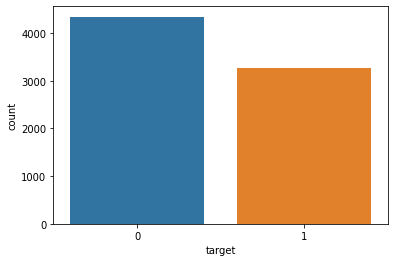

In [ ]:
import seaborn as sns
sns.countplot(x='target', data=train)

In [ ]:
data=train[['text','target']]#We will use the data to first of all remove all the bakwaas words and then add imp words 

In [ ]:
data_pos = data[data['target'] == 1]
data_neg = data[data['target'] == 0]

In [ ]:
data['text']=data['text'].str.lower()

<ipython-input-15-1b9a097728ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text']=data['text'].str.lower()


In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
STOPWORDS = set(stopwordlist)

In [ ]:
dataset = pd.concat([data_pos, data_neg])

In [ ]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])#return " ".join(word for word in str(text).split() basically means word is splited and  adds if word not in string#
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

0    Our Deeds Reason #earthquake May ALLAH Forgive us
1               Forest fire near La Ronge Sask. Canada
2    All residents asked 'shelter place' notified o...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent photo Ruby #Alaska smoke #wildfi...
Name: text, dtype: object

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)#maketrans will be replaced by '' punctutations list'
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

7581    engineshed Great atmosphere British Lion gig t...
7582    Cramer Igers 3 words wrecked Disneys stock  CN...
7584    These boxes ready explode Exploding Kittens fi...
7587                                    Sirens everywhere
7593       I heard really loud bang everyone asleep great
Name: text, dtype: object

In [ ]:
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))#used to remove repeating characters by a single character and replacing by a space
dataset['text'].tail

<bound method NDFrame.tail of 0        Our Deeds Reason earthquake May ALLAH Forgive us
1                   Forest fire near La Ronge Sask Canada
2       All residents asked shelter place notified off...
3       13000 people receive wildfires evacuation orde...
4       Just got sent photo Ruby Alaska smoke wildfire...
                              ...                        
7581    engineshed Great atmosphere British Lion gig t...
7582    Cramer Igers 3 words wrecked Disneys stock  CN...
7584    These boxes ready explode Exploding Kittens fi...
7587                                    Sirens everywhere
7593       I heard really loud bang everyone asleep great
Name: text, Length: 7613, dtype: object>

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))#removing url
dataset['text'].tail()

7581    engineshed Great atmosphere British Lion gig t...
7582    Cramer Igers 3 words wrecked Disneys stock  CN...
7584    These boxes ready explode Exploding Kittens fi...
7587                                    Sirens everywhere
7593       I heard really loud bang everyone asleep great
Name: text, dtype: object

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))#replacing numbers by space 
dataset['text'].tail()

7581    engineshed Great atmosphere British Lion gig t...
7582    Cramer Igers  words wrecked Disneys stock  CNB...
7584    These boxes ready explode Exploding Kittens fi...
7587                                    Sirens everywhere
7593       I heard really loud bang everyone asleep great
Name: text, dtype: object

In [ ]:
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)#tokenizing all the words so that we get a list of words 
dataset['text'].head()

0    [Our, Deeds, Reason, earthquake, May, ALLAH, F...
1        [Forest, fire, near, La, Ronge, Sask, Canada]
2    [All, residents, asked, shelter, place, notifi...
3    [people, receive, wildfires, evacuation, order...
4    [Just, got, sent, photo, Ruby, Alaska, smoke, ...
Name: text, dtype: object

In [ ]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))#stemming to merge all the words to the stem words 
dataset['text'].head()

0    [Our, Deeds, Reason, earthquake, May, ALLAH, F...
1        [Forest, fire, near, La, Ronge, Sask, Canada]
2    [All, residents, asked, shelter, place, notifi...
3    [people, receive, wildfires, evacuation, order...
4    [Just, got, sent, photo, Ruby, Alaska, smoke, ...
Name: text, dtype: object

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

0    [Our, Deeds, Reason, earthquake, May, ALLAH, F...
1        [Forest, fire, near, La, Ronge, Sask, Canada]
2    [All, residents, asked, shelter, place, notifi...
3    [people, receive, wildfires, evacuation, order...
4    [Just, got, sent, photo, Ruby, Alaska, smoke, ...
Name: text, dtype: object

In [ ]:
import re
import nltk
from nltk.stem import PorterStemmer

def clean(text):
   
    pattern = re.compile('[^a-zA-Z]')
    words = nltk.word_tokenize(text)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [PorterStemmer().stem(word) for word in words if word.lower() not in stop_words]
    cleaned_text = ' '.join(words)
    return cleaned_text

In [ ]:
data['text'] = dataset['text'].apply(lambda x: ','.join(map(str, x)))

<ipython-input-30-ab731e37df58>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = dataset['text'].apply(lambda x: ','.join(map(str, x)))


In [ ]:
data['text'] = data['text'].str.replace(',', ' ')

<ipython-input-31-f82aedf86dc6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].str.replace(',', ' ')


In [ ]:
data.head()

,text,target
0,Our Deeds Reason earthquake May ALLAH Forgive us,1
1,Forest fire near La Ronge Sask Canada,1
2,All residents asked shelter place notified off...,1
3,people receive wildfires evacuation orders Cal...,1
4,Just got sent photo Ruby Alaska smoke wildfire...,1


In [ ]:
data.head()

,text,target
0,Our Deeds Reason earthquake May ALLAH Forgive us,1
1,Forest fire near La Ronge Sask Canada,1
2,All residents asked shelter place notified off...,1
3,people receive wildfires evacuation orders Cal...,1
4,Just got sent photo Ruby Alaska smoke wildfire...,1


In [ ]:
X=data.text
y=data.target

seperating text and label for using algorithms

In [ ]:
import matplotlib.pyplot as plt 
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from wordcloud import WordCloud 

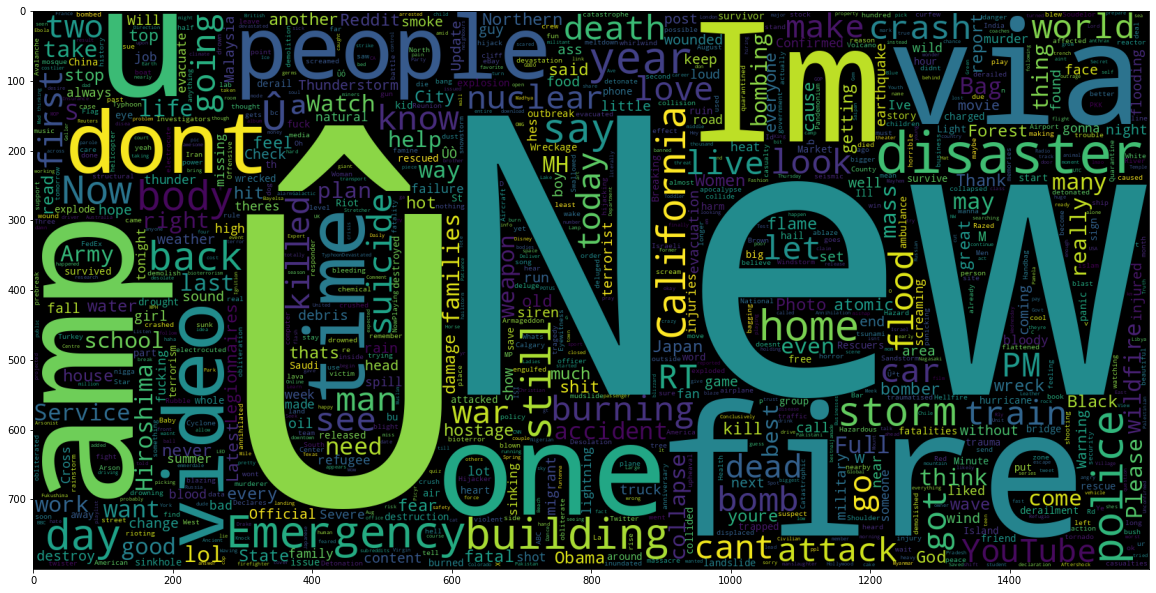

In [ ]:
data_pos = data['text']
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [ ]:
#TD-IDF is a text vectorizer will be used to transform the text into vector tf*idf idf=log(n/dfi) tf= how imp df=how many times occuring idf is the weight of the term 

In [ ]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)


TfidfVectorizer(max_features=500000, ngram_range=(1, 2))

In [ ]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
def model_Evaluate(model):
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

In [ ]:
print(y_pred2)

[1 1 1 ... 1 1 1]


In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving test_nlp.csv to test_nlp.csv


In [ ]:
test=pd.read_csv('test_nlp.csv')

In [ ]:
test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
test.drop(['keyword','location'],axis=1,inplace=True)

In [ ]:
test.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
dataset1=test

In [ ]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])#return " ".join(word for word in str(text).split() basically means word is splited and  adds if word not in string#
dataset1['text'] = dataset1['text'].apply(lambda text: cleaning_stopwords(text))
dataset1['text'].head()

0                     Just happened terrible car crash
1    Heard #earthquake different cities, stay safe ...
2    forest fire spot pond, geese fleeing across st...
3             Apocalypse lighting. #Spokane #wildfires
4               Typhoon Soudelor kills 28 China Taiwan
Name: text, dtype: object

In [ ]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)#maketrans will be replaced by '' punctutations list'
    return text.translate(translator)
dataset1['text']= dataset1['text'].apply(lambda x: cleaning_punctuations(x))
dataset1['text'].tail()

3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm RI worse last hurricane My cityamp3other...
3260      Green Line derailment Chicago httptcoUtbXLcBIuY
3261    MEG issues Hazardous Weather Outlook HWO httpt...
3262    CityofCalgary activated Municipal Emergency Pl...
Name: text, dtype: object

In [ ]:
import re
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset1['text'] = dataset1['text'].apply(lambda x: cleaning_repeating_char(x))#used to remove repeating characters by a single character and replacing by a space
dataset1['text'].tail

<bound method NDFrame.tail of 0                        Just happened terrible car crash
1       Heard earthquake different cities stay safe ev...
2       forest fire spot pond geese fleeing across str...
3                   Apocalypse lighting Spokane wildfires
4                  Typhoon Soudelor kills 28 China Taiwan
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm RI worse last hurricane My cityamp3other...
3260      Green Line derailment Chicago httptcoUtbXLcBIuY
3261    MEG issues Hazardous Weather Outlook HWO httpt...
3262    CityofCalgary activated Municipal Emergency Pl...
Name: text, Length: 3263, dtype: object>

In [ ]:
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset1['text'] = dataset1['text'].apply(lambda x: cleaning_URLs(x))#removing url
dataset1['text'].tail()

3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm RI worse last hurricane My cityamp3other...
3260      Green Line derailment Chicago httptcoUtbXLcBIuY
3261    MEG issues Hazardous Weather Outlook HWO httpt...
3262    CityofCalgary activated Municipal Emergency Pl...
Name: text, dtype: object

In [ ]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset1['text'] = dataset1['text'].apply(lambda x: cleaning_numbers(x))#replacing numbers by space 
dataset1['text'].tail()

3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259    Storm RI worse last hurricane My cityampothers...
3260      Green Line derailment Chicago httptcoUtbXLcBIuY
3261    MEG issues Hazardous Weather Outlook HWO httpt...
3262    CityofCalgary activated Municipal Emergency Pl...
Name: text, dtype: object

In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset1['text'] = dataset1['text'].apply(tokenizer.tokenize)#tokenizing all the words so that we get a list of words 
dataset1['text'].head()

0               [Just, happened, terrible, car, crash]
1    [Heard, earthquake, different, cities, stay, s...
2    [forest, fire, spot, pond, geese, fleeing, acr...
3           [Apocalypse, lighting, Spokane, wildfires]
4            [Typhoon, Soudelor, kills, China, Taiwan]
Name: text, dtype: object

In [ ]:
dataset1

,id,text
0,0,"[Just, happened, terrible, car, crash]"
1,2,"[Heard, earthquake, different, cities, stay, s..."
2,3,"[forest, fire, spot, pond, geese, fleeing, acr..."
3,9,"[Apocalypse, lighting, Spokane, wildfires]"
4,11,"[Typhoon, Soudelor, kills, China, Taiwan]"
...,...,...
3258,10861,"[EARTHQUAKE, SAFETY, LOS, ANGELES, ÛÒ, SAFETY,..."
3259,10865,"[Storm, RI, worse, last, hurricane, My, cityam..."
3260,10868,"[Green, Line, derailment, Chicago, httptcoUtbX..."
3261,10874,"[MEG, issues, Hazardous, Weather, Outlook, HWO..."


In [ ]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset1['text'] = dataset1['text'].apply(lambda x: lemmatizer_on_text(x))
dataset1['text'].head()

0               [Just, happened, terrible, car, crash]
1    [Heard, earthquake, different, cities, stay, s...
2    [forest, fire, spot, pond, geese, fleeing, acr...
3           [Apocalypse, lighting, Spokane, wildfires]
4            [Typhoon, Soudelor, kills, China, Taiwan]
Name: text, dtype: object

In [ ]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset1['text']= dataset1['text'].apply(lambda x: stemming_on_text(x))#stemming to merge all the words to the stem words 
dataset1['text'].head()

0               [Just, happened, terrible, car, crash]
1    [Heard, earthquake, different, cities, stay, s...
2    [forest, fire, spot, pond, geese, fleeing, acr...
3           [Apocalypse, lighting, Spokane, wildfires]
4            [Typhoon, Soudelor, kills, China, Taiwan]
Name: text, dtype: object

In [ ]:
dataset1

,id,text
0,0,"[Just, happened, terrible, car, crash]"
1,2,"[Heard, earthquake, different, cities, stay, s..."
2,3,"[forest, fire, spot, pond, geese, fleeing, acr..."
3,9,"[Apocalypse, lighting, Spokane, wildfires]"
4,11,"[Typhoon, Soudelor, kills, China, Taiwan]"
...,...,...
3258,10861,"[EARTHQUAKE, SAFETY, LOS, ANGELES, ÛÒ, SAFETY,..."
3259,10865,"[Storm, RI, worse, last, hurricane, My, cityam..."
3260,10868,"[Green, Line, derailment, Chicago, httptcoUtbX..."
3261,10874,"[MEG, issues, Hazardous, Weather, Outlook, HWO..."


In [ ]:
test['text'] = dataset1['text'].apply(lambda x: ','.join(map(str, x)))

In [ ]:
test

,id,text
0,0,"Just,happened,terrible,car,crash"
1,2,"Heard,earthquake,different,cities,stay,safe,ev..."
2,3,"forest,fire,spot,pond,geese,fleeing,across,str..."
3,9,"Apocalypse,lighting,Spokane,wildfires"
4,11,"Typhoon,Soudelor,kills,China,Taiwan"
...,...,...
3258,10861,"EARTHQUAKE,SAFETY,LOS,ANGELES,ÛÒ,SAFETY,FASTEN..."
3259,10865,"Storm,RI,worse,last,hurricane,My,cityampothers..."
3260,10868,"Green,Line,derailment,Chicago,httptcoUtbXLcBIuY"
3261,10874,"MEG,issues,Hazardous,Weather,Outlook,HWO,httpt..."


In [ ]:
test['text'] = test['text'].str.replace(',', ' ')

In [ ]:
test.head()

,id,text
0,0,Just happened terrible car crash
1,2,Heard earthquake different cities stay safe ev...
2,3,forest fire spot pond geese fleeing across str...
3,9,Apocalypse lighting Spokane wildfires
4,11,Typhoon Soudelor kills China Taiwan


In [ ]:
x1=test['text']

In [ ]:
x1

0                        Just happened terrible car crash
1       Heard earthquake different cities stay safe ev...
2       forest fire spot pond geese fleeing across str...
3                   Apocalypse lighting Spokane wildfires
4                     Typhoon Soudelor kills China Taiwan
                              ...                        
3258    EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTEN...
3259    Storm RI worse last hurricane My cityampothers...
3260      Green Line derailment Chicago httptcoUtbXLcBIuY
3261    MEG issues Hazardous Weather Outlook HWO httpt...
3262    CityofCalgary activated Municipal Emergency Pl...
Name: text, Length: 3263, dtype: object

In [ ]:

x1 = vectoriser.transform(x1)

In [ ]:
id=test['id']


              precision    recall  f1-score   support

           0       0.82      0.85      0.84       220
           1       0.79      0.74      0.76       161

    accuracy                           0.81       381
   macro avg       0.80      0.80      0.80       381
weighted avg       0.81      0.81      0.80       381



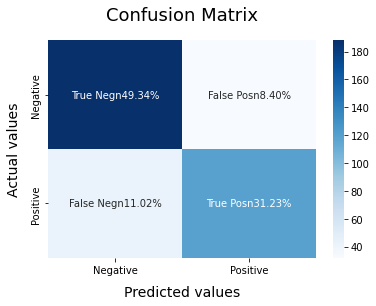

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)

y_pred2 = SVCmodel.predict(x1)


In [ ]:
y_pred2.shape

(3263,)

In [ ]:
id.shape

(3263,)

In [ ]:
df_1=pd.DataFrame({'id':id,'price1':y_pred2})
df_1.head(123)

,id,price1
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
118,385,0
119,387,1
120,388,0
121,391,0


In [ ]:
df_1.to_csv('file2.csv', index=False)

In [ ]:
from google.colab import files
df_1.to_csv('file2.csv', encoding = 'utf-8-sig') 
files.download('file2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>